In [2]:
import networkx as nx
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit import QuantumCircuit
from qiskit.circuit import Measure
from qiskit.quantum_info import Operator
import numpy as np

In [3]:
#G = nx.random_geometric_graph(200, 0.125)

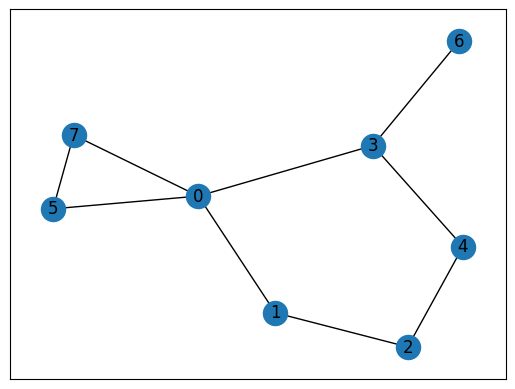

In [4]:
G = nx.Graph()
G.add_edges_from([[0,1],[0,3],[0,5],[0,7],[5,7],[1,2],[2,4],[3,4],[3,6]])
nx.draw_networkx(G)

In [5]:
operator = SparsePauliOp.from_list(
    [("IIIIIIZZ", 0.5), 
     ("IIIIZIIZ", 0.5), 
     ("IIZIIIIZ", 0.5), 
     ("ZIIIIIIZ", 0.5), 
     ("ZIZIIIII", 0.5), 
     ("IIIIIZZI", 0.5), 
     ("IIIZIZII", 0.5), 
     ("IIIZZIII", 0.5), 
     ("IZIIZIII", 0.5),]
)

print("Cost Function Hamiltonian:", operator)

Cost Function Hamiltonian: SparsePauliOp(['IIIIIIZZ', 'IIIIZIIZ', 'IIZIIIIZ', 'ZIIIIIIZ', 'ZIZIIIII', 'IIIIIZZI', 'IIIZIZII', 'IIIZZIII', 'IZIIZIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
 0.5+0.j])


In [6]:
def bitfield(n, L):
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part

In [7]:
L = G.number_of_nodes()
max = 2**L
sol = np.inf
sum_max=0
for i in range(max):
    cur = bitfield(i, L)
    sum=0
    for u,v in G.edges():
        if (cur[u] != cur[v]): sum=sum+1
    if (sum > sum_max):
        sum_max=sum
        bitstring = cur
    #print(i, cur, sum)
print(bitstring)

[0, 0, 1, 1, 0, 0, 0, 1]


In [8]:
colors = []
for node in G:
    #print(node)
    if bitstring[node]==0:
        colors.append("red")
    else:
        colors.append("green")

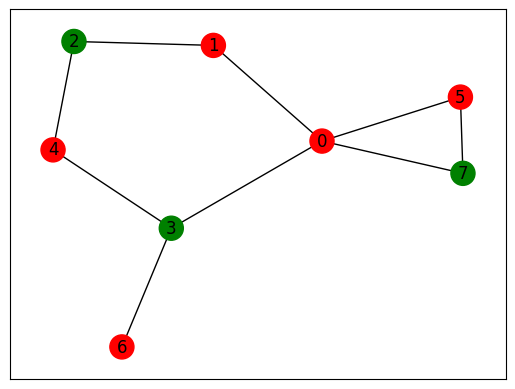

In [9]:
nx.draw_networkx(G, node_color = colors)